In [1]:
#importing all the libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd


In [2]:
#Loading our data
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using the elbow method to determine the value of K to find the appropriate number of Clusters

In [4]:
x = iris_data.iloc[:, 0:3].values

In [19]:
x[0:10]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5]])

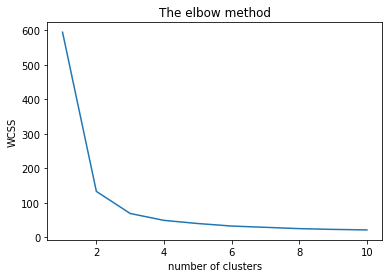

In [6]:
from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting a line graph    

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

### As observed, here wcss doesn't decrease much after '3', Hence we choose 3 as the number of clusters.

In [7]:
#Applying Kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

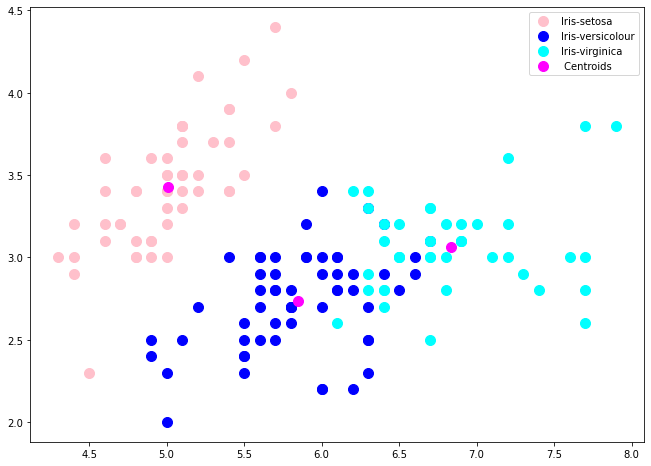

In [17]:
#Visualising the clusters on the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,  1],
           s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s =100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100 , c = 'cyan', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'magenta', label = ' Centroids')
plt.rcParams["figure.figsize"] = (11,8)
plt.legend()